In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteX9PC1C/imdb_reviews-train.tfrecord…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteX9PC1C/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteX9PC1C/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [3]:
train_data, test_data = imdb['train'], imdb['test']

In [4]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s,l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())

for s,l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [5]:
# Alguns exemplos de sentenças

print(training_sentences[0])
print(testing_sentences[0])

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the afore

In [6]:
vocab_size = 10000
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [7]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [8]:
embedding_dim = 16
lstm_dim = 32
dense_dim = 6

model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 dropout (Dropout)           (None, 120, 16)           0         
                                                                 
 bidirectional (Bidirectiona  (None, 64)               12544     
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                                 
 dropout_2 (Dropout)         (None, 6)                 0         
                                                        

In [9]:
NUM_EPOCHS = 15
BATCH_SIZE = 128

history_lstm = model_lstm.fit(padded, training_labels_final, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))

Epoch 1/15
196/196 [==============================] - 46s 203ms/step - loss: 0.6932 - accuracy: 0.5025 - val_loss: 0.6931 - val_accuracy: 0.5122
Epoch 2/15
196/196 [==============================] - 37s 188ms/step - loss: 0.6895 - accuracy: 0.5263 - val_loss: 0.6398 - val_accuracy: 0.7118
Epoch 3/15
196/196 [==============================] - 39s 198ms/step - loss: 0.6299 - accuracy: 0.6601 - val_loss: 0.5018 - val_accuracy: 0.8250
Epoch 4/15
196/196 [==============================] - 40s 202ms/step - loss: 0.5479 - accuracy: 0.7403 - val_loss: 0.4346 - val_accuracy: 0.8382
Epoch 5/15
196/196 [==============================] - 39s 200ms/step - loss: 0.5100 - accuracy: 0.7751 - val_loss: 0.4351 - val_accuracy: 0.8348
Epoch 6/15
196/196 [==============================] - 39s 201ms/step - loss: 0.4730 - accuracy: 0.7967 - val_loss: 0.4070 - val_accuracy: 0.8462
Epoch 7/15
196/196 [==============================] - 37s 191ms/step - loss: 0.4561 - accuracy: 0.8080 - val_loss: 0.4109 - val_ac

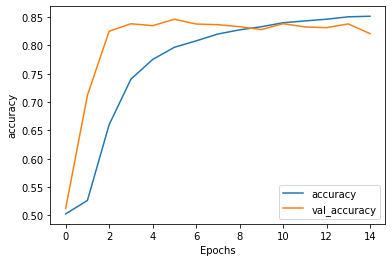

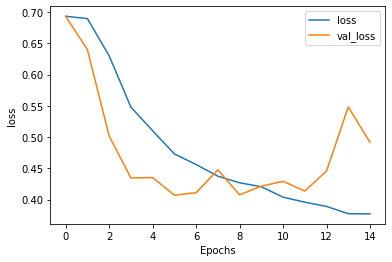

In [10]:
plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')

In [82]:
Text = ['Shazam! Fury of the Gods is one of those superhero movies that feels a little overly stuffed and overly complicated in an attempt to make it bigger and bolder than the first film.', 'With its fun family dynamic, dangerous new villains, and heartwarming storyline, it’s another solid follow-up to the Shazam! series.']

In [83]:
text2sequence = tokenizer.texts_to_sequences(Text)
padding = pad_sequences(text2sequence,maxlen=max_length)

In [84]:
predict = model_lstm.predict(padding)

1/1 [==============================] - 0s 50ms/step


In [85]:
if predict[0] >= 0.5:
  print('Falou bem')
else: print('Falou mal')

Falou mal


In [86]:
if predict[1] >= 0.5:
  print('Falou bem')
else: print('Falou mal')

Falou bem
